Here are the attributes included in the Forest Fire dataset:

    X: x-coordinate within the Montesinho park map.
    Y: y-coordinate within the Montesinho park map.
    Month: Month of the year (e.g., "jan" for January, "feb" for February, etc.).
    Day: Day of the week (e.g., "mon" for Monday, "tue" for Tuesday, etc.).
    FFMC (Fine Fuel Moisture Code): Index related to moisture content of fine fuels (e.g., twigs, grass).
    DMC (Duff Moisture Code): Index related to moisture content of decomposed organic material (e.g., leaves, branches).
    DC (Drought Code): Index related to drought conditions of deep organic layers (e.g., peat).
    ISI (Initial Spread Index): Index related to the rate of fire spread.
    Temp (Temperature): Temperature in Celsius degrees.
    RH (Relative Humidity): Relative humidity in percentage.
    Wind: Wind speed in kilometers per hour.
    Rain: Outside rain in millimeters per square meter.
    Area: Total burned area in hectares (target variable).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import LabelEncoder

# Function to convert month and day columns to numeric
def convert_to_numeric(df):
    month_to_numeric = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    day_to_numeric = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

    df['month'] = df['month'].map(month_to_numeric)
    df['day'] = df['day'].map(day_to_numeric)

    return df

In [14]:
# Function to clean the data
def clean_data(df):
    # Remove rows with missing values
    df.dropna(inplace=True)
    return df

In [15]:
file_path = 'forestfires.csv'
df = pd.read_csv(file_path)
df = convert_to_numeric(df)
df = clean_data(df)
display(df.head())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [16]:
# Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [17]:
# Applying K-means clustering
kmeans_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_inertia.append(kmeans.inertia_)

# Applying Gaussian Mixture Model (GMM) clustering
bic_scores = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_data)
    bic_scores.append(gmm.bic(scaled_data))

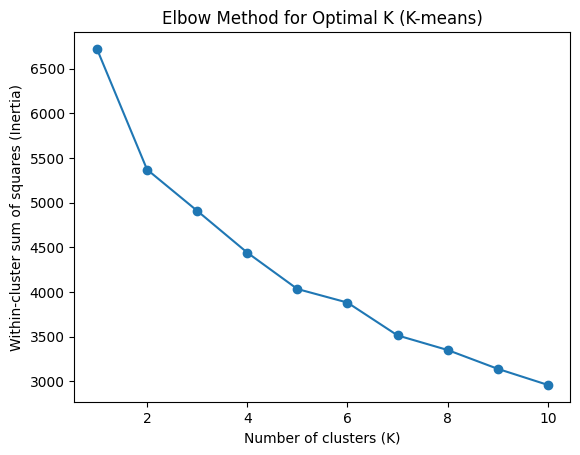

In [18]:
# Plotting the elbow curve to find the suitable choice of K for K-means
plt.plot(range(1, 11), kmeans_inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (Inertia)')
plt.title('Elbow Method for Optimal K (K-means)')
plt.show()

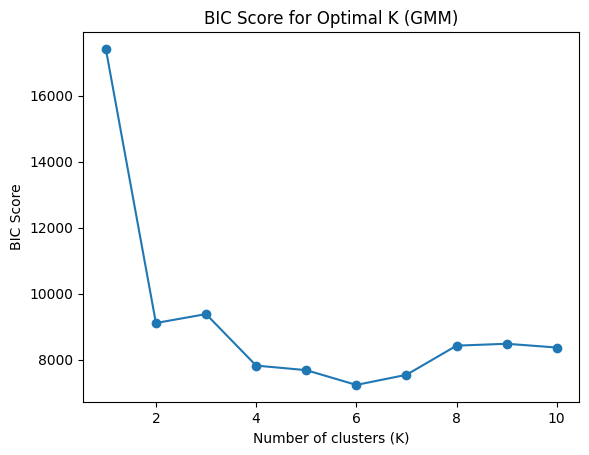

In [19]:
# Plotting the BIC scores to find the suitable choice of K for GMM
plt.plot(range(1, 11), bic_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('BIC Score')
plt.title('BIC Score for Optimal K (GMM)')
plt.show()

In [20]:
# K-means clustering with K=5
kmeans = KMeans(n_clusters=5,n_init = 10, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# GMM clustering with K=6
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

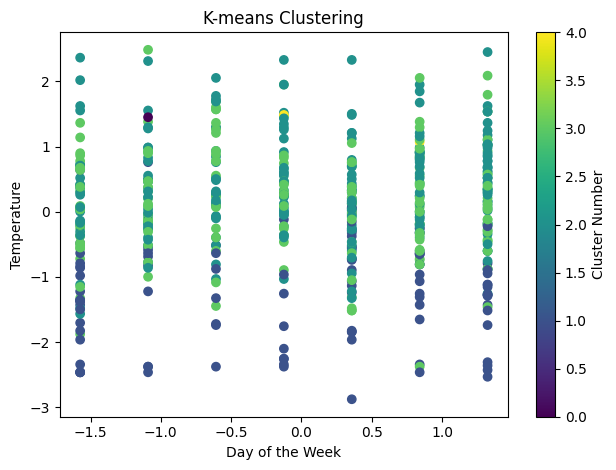

In [12]:
# Plotting K-means clusters
plt.scatter(scaled_data[:, 3], scaled_data[:, 8], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Day of the Week')
plt.ylabel('Temperature')
plt.tight_layout()
plt.colorbar(label='Cluster Number')
plt.show()

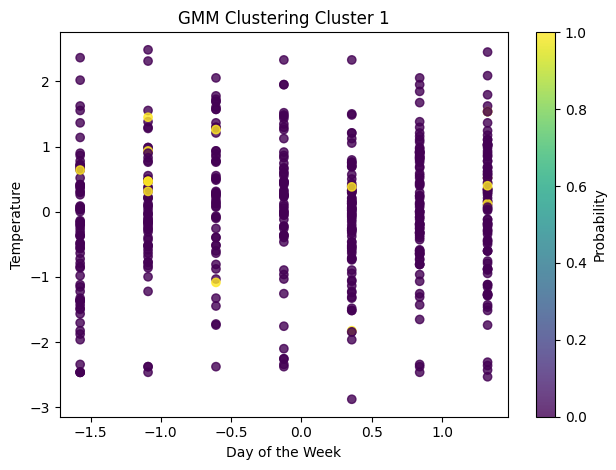

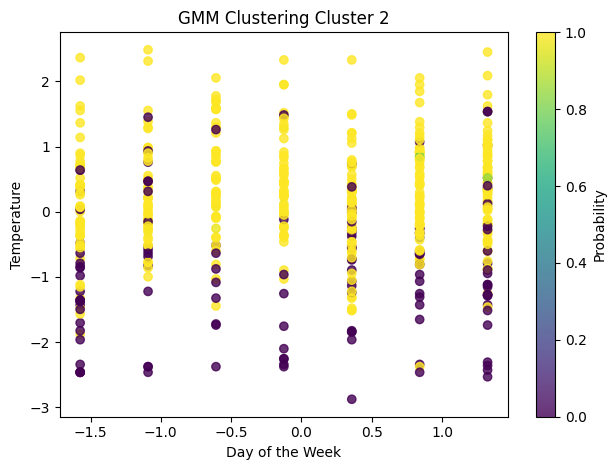

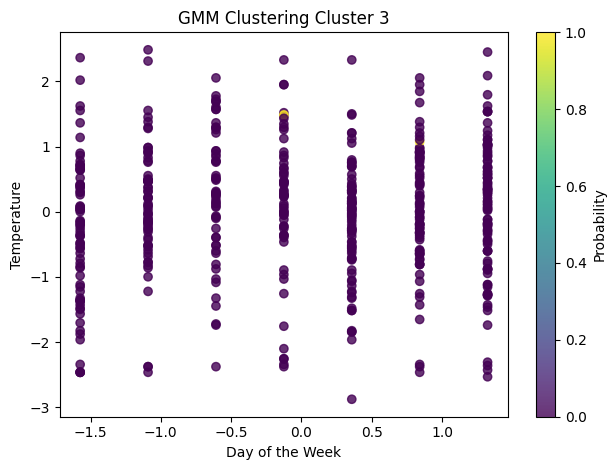

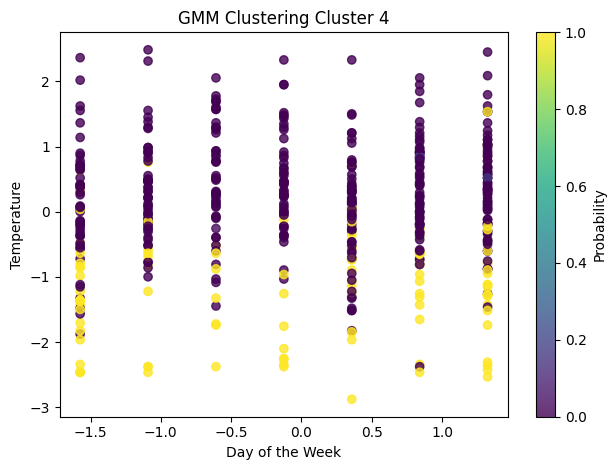

In [21]:
# Plotting GMM clusters
for i in range(len(gmm.means_)):
    probs = gmm.predict_proba(scaled_data)
    plt.scatter(scaled_data[:, 3], scaled_data[:, 8], c=probs[:, i], cmap='viridis', alpha=0.8)
    plt.colorbar(label='Probability')
    plt.title(f'GMM Clustering Cluster {i+1}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Temperature')
    plt.tight_layout()
    plt.show()

In [22]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(scaled_data)
df_red = pd.DataFrame(df_reduced, columns=['PC_1', 'PC_2'])
display(df_red.head())

# Normalize the reduced data
normalized_reduced_data = normalize(df_reduced)
df_normalized = pd.DataFrame(normalized_reduced_data, columns=['PC_1', 'PC_2'])
display(df_normalized.head())

,PC_1,PC_2
0,3.872718,0.805349
1,-0.230963,0.173151
2,-0.047735,0.168102
3,3.634749,2.258034
4,3.277363,2.150332


,PC_1,PC_2
0,0.979054,0.203599
1,-0.800119,0.599841
2,-0.273162,0.961968
3,0.849432,0.527697
4,0.836099,0.548578


In [23]:
variance_of_each_column = df_normalized.var()

# Display the variance of each column
print("Variance of each column:")
print(variance_of_each_column)

Variance of each column:
PC_1    0.539397
PC_2    0.422513
dtype: float64


# Spectral Clustering on Reduced Dataset(Using PCA)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


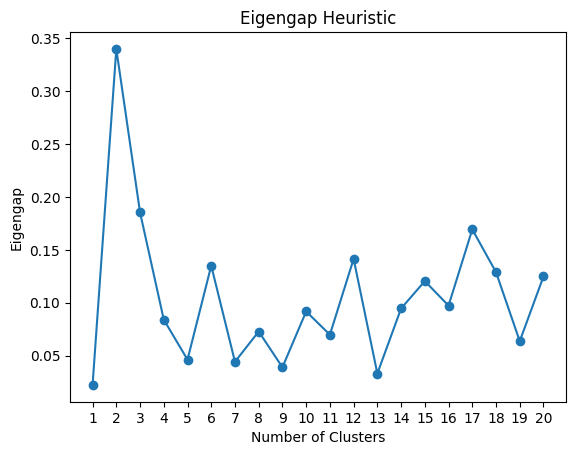

2


In [26]:
from sklearn.neighbors import kneighbors_graph

similarity_matrix = kneighbors_graph(df_red, n_neighbors=10, mode='connectivity', include_self=True)
similarity_matrix = similarity_matrix.toarray()
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
laplacian_matrix = degree_matrix - similarity_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
eigengaps = np.diff(sorted_eigenvalues)
eigengaps = eigengaps[:20]
optimal_k_index = np.argmax(eigengaps)

# Plot eigengaps
plt.plot(range(1, len(eigengaps) + 1), eigengaps, marker='o')
plt.title('Eigengap Heuristic')
plt.xlabel('Number of Clusters')
plt.ylabel('Eigengap')
plt.xticks(np.arange(1, len(eigengaps) + 1, step=1))  # Adjust step value as needed
plt.show()

optimal_k = optimal_k_index + 1
print(optimal_k)

### a) Using nearest_neighbours

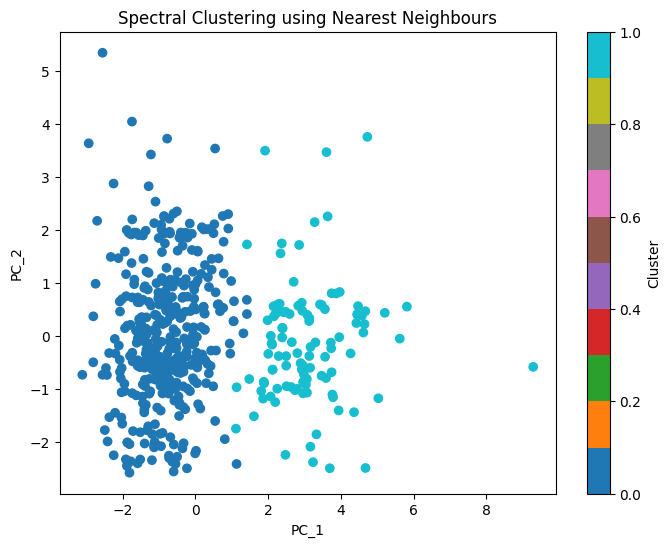

In [27]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors')

# Fit and predict cluster labels
nn_labels = spectral_clustering.fit_predict(df_red)

plt.figure(figsize=(8, 6))
plt.scatter(df_red['PC_1'], df_red['PC_2'], c=nn_labels, cmap='tab10')
plt.title('Spectral Clustering using Nearest Neighbours')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.colorbar(label='Cluster')
plt.show()

### b) Using rbf

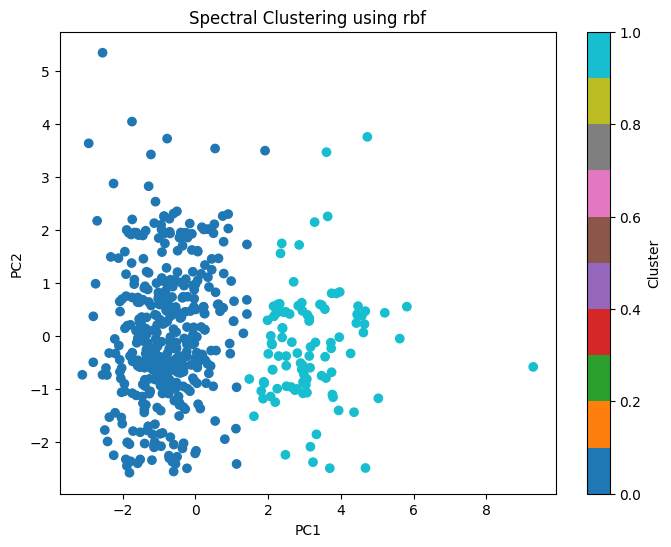

In [28]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='rbf')

# Fit and predict cluster labels
rbf_labels = spectral_clustering.fit_predict(df_red)

plt.figure(figsize=(8, 6))
plt.scatter(df_red['PC_1'], df_red['PC_2'], c=rbf_labels, cmap='tab10')
plt.title('Spectral Clustering using rbf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

### Comparing results using Silhouette Score

Silhouette Score for 'nearest_neighbors' affinity: 0.5469026277246615
Silhouette Score for 'rbf' affinity: 0.5485962542114098


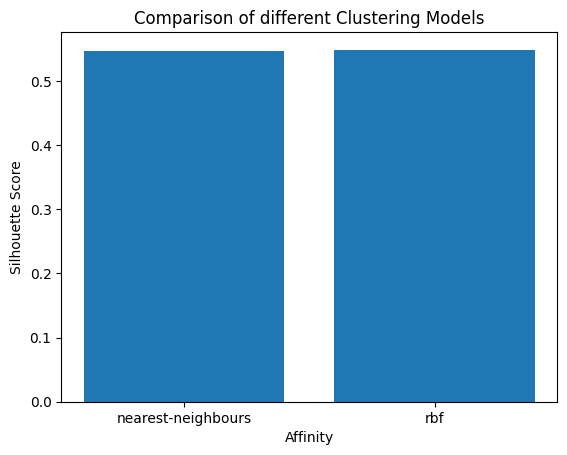

In [29]:
affinity = ['nearest-neighbours', 'rbf']

s_scores = []
s_scores.append(silhouette_score(df_red, nn_labels))
s_scores.append(silhouette_score(df_red, rbf_labels))

print("Silhouette Score for 'nearest_neighbors' affinity:", s_scores[0])
print("Silhouette Score for 'rbf' affinity:", s_scores[1])

# Plotting Bar Graph to compare the Models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

# Spectral Clustering on Normalised Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


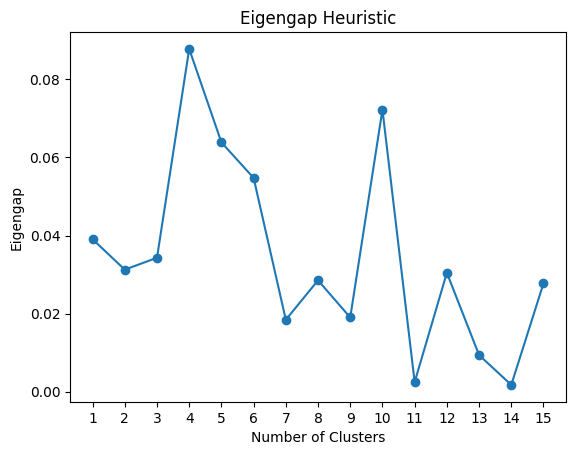

4


In [31]:
from sklearn.neighbors import kneighbors_graph

similarity_matrix = kneighbors_graph(df_normalized, n_neighbors=10, mode='connectivity', include_self=True)

similarity_matrix = similarity_matrix.toarray()
degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
laplacian_matrix = degree_matrix - similarity_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
eigengaps = np.diff(sorted_eigenvalues)
eigengaps = eigengaps[:15]
optimal_k_index = np.argmax(eigengaps)
# Check if optimal_k_index is 0
if optimal_k_index == 0:
    optimal_k_index = np.argsort(eigengaps)[-2]  # Second highest eigengap

# Plot eigengaps
plt.plot(range(1, len(eigengaps) + 1), eigengaps, marker='o')
plt.title('Eigengap Heuristic')
plt.xlabel('Number of Clusters')
plt.ylabel('Eigengap')
plt.xticks(np.arange(1, len(eigengaps) + 1, step=1))  # Adjust step value as needed
plt.show()

optimal_k = optimal_k_index + 1
print(optimal_k)

### a) Using Nearest Neighbours

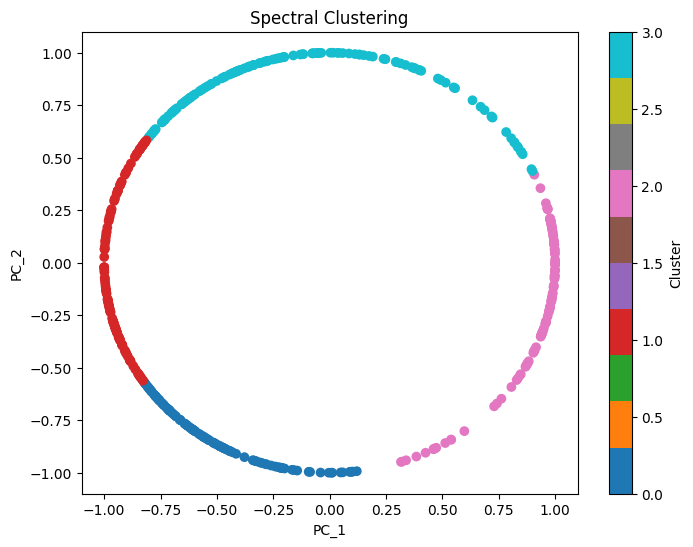

In [32]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors')
nn_labels = spectral_clustering.fit_predict(df_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['PC_1'], df_normalized['PC_2'], c=nn_labels, cmap='tab10')
plt.title('Spectral Clustering')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.colorbar(label='Cluster')
plt.show()

### b) Using rbf

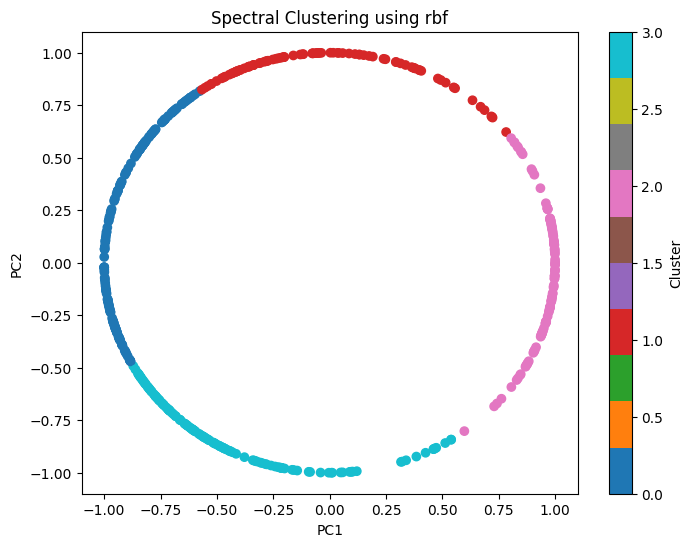

In [33]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=optimal_k, affinity='rbf')
rbf_labels = spectral_clustering.fit_predict(df_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['PC_1'], df_normalized['PC_2'], c=rbf_labels, cmap='tab10')
plt.title('Spectral Clustering using rbf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

### Comparing the models using Silhouette Score

Silhouette Score for 'nearest_neighbors' affinity: 0.51145834365948
Silhouette Score for 'rbf' affinity: 0.5294386475660305


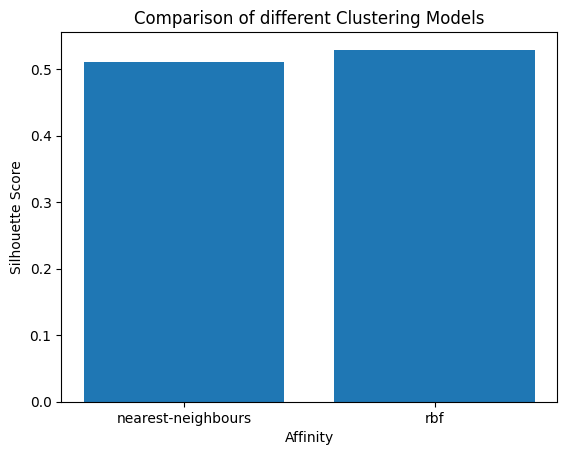

In [34]:
affinity = ['nearest-neighbours', 'rbf']
s_scores = []
s_scores.append(silhouette_score(df_normalized, nn_labels))
s_scores.append(silhouette_score(df_normalized, rbf_labels))
print("Silhouette Score for 'nearest_neighbors' affinity:", s_scores[0])
print("Silhouette Score for 'rbf' affinity:", s_scores[1])

# Plotting Bar Graph to compare the Models
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()